In [2]:
# !pip install pyreadr
# !wget -O 48_-_breast_cancer_data.RData "https://zenodo.org/records/7657781/files/48_-_breast_cancer_data.RData?download=1"

import pyreadr
import pandas as pd

raw_data = pyreadr.read_r('48_-_breast_cancer_data.RData')['out']
raw_data.to_csv('dataset')

df = raw_data.copy()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.9/440.9 kB 7.3 MB/s eta 0:00:00


# test for outliers in age

In [6]:
quartiles = df['der_age_trunc'].quantile([0.25,0.5,0.75]).values
iqr = quartiles[-1] - quartiles[0]
quartiles, iqr

(array([51., 61., 72.]), 21.0)

In [7]:
ages = df['der_age_trunc'].values
outliers = [x for x in ages if ((x < (quartiles[0] - (1.5*iqr))) | (x > (quartiles[2] + (1.5*iqr))))]
print(f'There are {len(outliers)} outliers based on age')

There are 0 outliers based on age


<Axes: xlabel='der_age_trunc', ylabel='der_cancer_status_v4'>

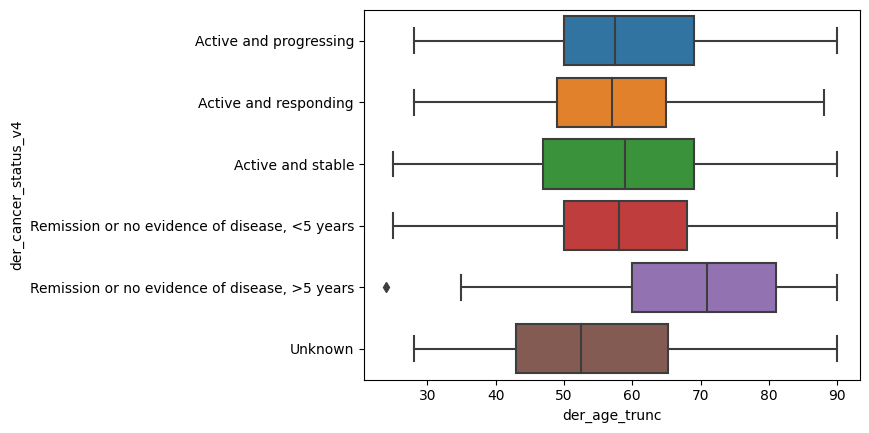

In [11]:
import seaborn as sns

df_reg = df[['der_age_trunc', 'der_cancer_status_v4']].dropna()

sns.boxplot(data=df_reg, x="der_age_trunc", y="der_cancer_status_v4")

<Axes: xlabel='der_age_trunc', ylabel='severity_of_covid_19_v2'>

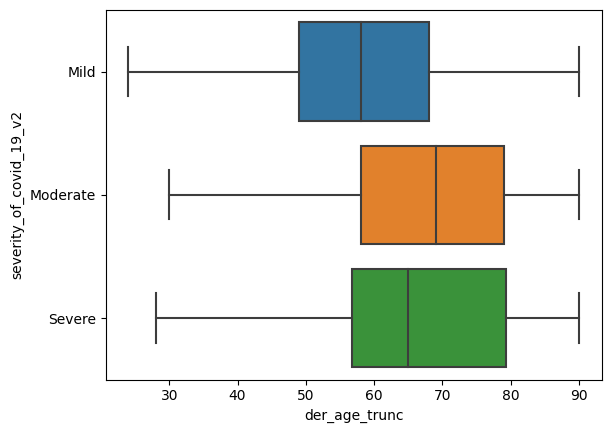

In [12]:
df_reg = df[['der_age_trunc', 'severity_of_covid_19_v2']].dropna()

sns.boxplot(data=df_reg, x="der_age_trunc", y="severity_of_covid_19_v2")

In [9]:
df_reg = df[['der_deadbinary', 'severity_of_covid_19_v2']].dropna()


# Creating a contingency table
contingency_table = pd.crosstab(df_reg['der_deadbinary'], df_reg['severity_of_covid_19_v2'])

contingency_table

severity_of_covid_19_v2,Mild,Moderate,Severe
der_deadbinary,,,
No,942,284,24
Yes,17,75,31
